In [1]:
from trainUMAP import *

In [2]:
save_path = '../4-Results/bengal/0923/lat10/'

In [3]:
x_lat = np.load(save_path+'/x_lat.npy')
sylla_list = np.load(save_path+'/../pre/sylla_list.npy')
x_lat.shape, sylla_list.shape

((54198, 10), (54198, 3))

## VAE-z=10

In [9]:
z10_umap = umap_embedding(x_lat, n_neighbors=100)

(54198, 2)


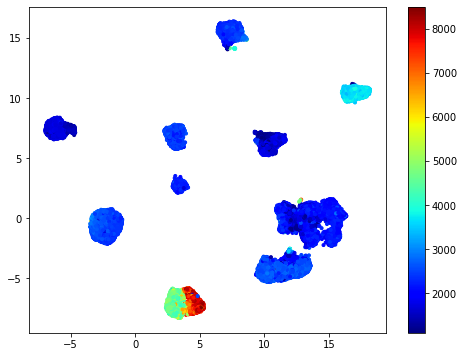

In [64]:
plot_project(z10_umap, sylla_list[:,2], save=save_path+'/plot_projection_dur')

In [ ]:
z10_labels = get_kmeans_labels(z10_umap, 10)

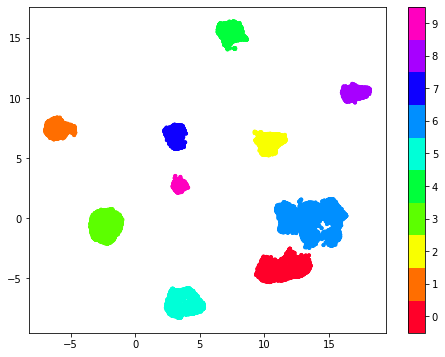

In [62]:
plot_cluster(z10_umap, z10_labels, save=save_path+'/plot_projection_group')

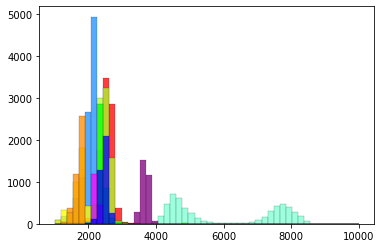

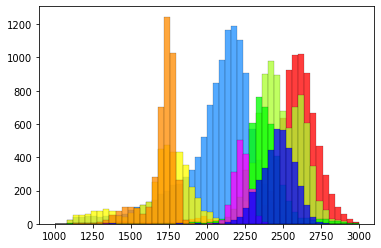

In [60]:
g_list = [6,0,5,2,3,4,9,1,7,8]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'lime', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(sylla_list[:,2], z10_labels, color, g_list, xmax=10000, save=save_path+'/plot_glenth')
hist_duration(sylla_list[:,2], z10_labels, color, g_list, xmax=3000, save = save_path+'/plot_glenth_3000')

## UMAP only

In [29]:
x_data = np.load(save_path+'../pre/data.npy')
x_flatten = x_data.reshape(len(x_data), 128*64)
x_flatten.shape

(54198, 8192)

In [31]:
x_umap = umap_embedding(x_flatten)

(54198, 2)


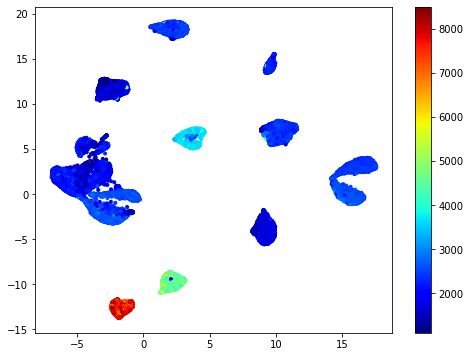

In [65]:
plot_project(x_umap, sylla_list[:,2], save=save_path+'../umap/plot_projection_dur')

In [48]:
kmeans_labels = get_kmeans_labels(x_umap, 12)

In [49]:
x_labels = [3 if i==8 else i for i in kmeans_labels]
x_labels = [8 if i==11 else i for i in x_labels]
#custom_labels = [9 if i==4 else i for i in custom_labels]

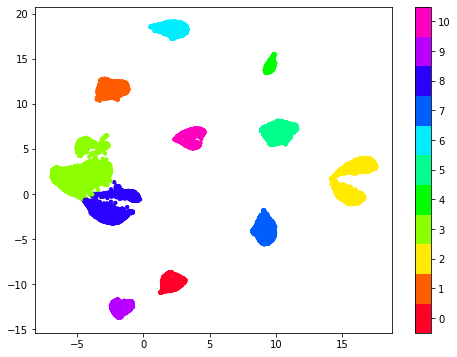

In [66]:
plot_cluster(x_umap, x_labels, save=save_path+'../umap/plot_projection_group')

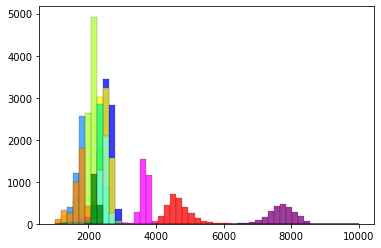

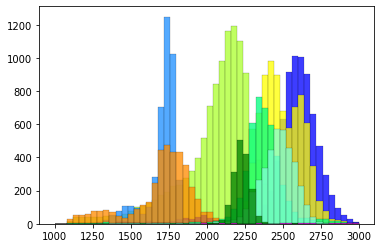

In [67]:
g_list = [3,8,2,7,1,5,6,4,9,10,0]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'green', 'springgreen','aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']
hist_duration(sylla_list[:,2], x_labels, color, g_list, xmax=10000, save=save_path+'../umap/plot_lenth')
hist_duration(sylla_list[:,2], x_labels, color, g_list, xmax=3000, save=save_path+'../umap/plot_lenth_3000')

In [59]:
g_list = [5,2,3,4,0,9,6,1]
color = ['r', 'darkorange', 'yellow', 'greenyellow', 'lime', 'springgreen', 'aquamarine', 'dodgerblue', 'blue', 'purple', 'magenta']

def hist_duration(lenth, labels, color, g_list, xmax=3000, save=None):
    a = 1
    for g in g_list:
        lenth_g = lenth[np.array(labels)==g]
        plt.hist(lenth_g, color=color[g], bins=50, range=(1000,xmax), alpha=0.76, linewidth=0.2, edgecolor='black')
    
    if save!=None:
        plt.savefig(save)
    plt.show()


In [96]:
np.save(save_path+'/x_umap', x_umap)
np.save(save_path+'/custom_label', np.array(custom_labels))